In [17]:
import gc   # For manual garbage collection.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from utils import traceplots
from inference_toolbox import Parameter, Model, Likelihood, Sampler
from GPM_analysis import GPM_analysis

# Import and select data.
all_data = pd.read_csv('total_data.csv')
#     usecols = ['gps.lat', 'gps.lon', 'altitudeRelative', 'Concentration', 'Experiment','Transect','Peak_Dist', 'Transect_Num'],

# Import and select metadata.
experiment_metadata = pd.read_csv('data_summary.csv',
    usecols = ['Experiment', 'Wind_Dir', 'WindSpeed', 'boat.lat', 'boat.lon']
)

for experiment in all_data.Experiment.unique():
    experiment_data = all_data[all_data['Experiment'] == experiment]

#     experiment_metadata = experiment_metadata[experiment_metadata['Experiment'] == experiment]
#     wind_dir = experiment_metadata['Wind_Dir'].values[0]
#     wind_speed = experiment_metadata['WindSpeed'].values[0]

    selected_data = experiment_data[['Concentration', 'Transect_Num', 'Height', 'Distance', 'Peak_Dist']]
    print('\n',experiment)
    for distance in selected_data.Distance.unique():
        distance_data = selected_data[selected_data.Distance == distance]
        print(distance, distance_data.Height.unique())

def get_data_we_want(data, meta_data):
    frames = []
    for experiment in data.Experiment.unique():
        experiment_data = data[all_data['Experiment'] == experiment].copy()

        # Import and select metadata.
        meta_data = pd.read_csv('data_summary.csv',
            usecols = ['Experiment', 'Wind_Dir', 'WindSpeed', 'boat.lat', 'boat.lon']
        )
        meta_data = meta_data[meta_data['Experiment'] == experiment]
        wind_dir = meta_data['Wind_Dir'].values[0]
        wind_speed = meta_data['WindSpeed'].values[0]

        # Converting lat and lon to distances from boat in downwind and crosswind directions.
        experiment_data['dist_lat'] = (experiment_data['gps.lat'] - meta_data['boat.lat'].values[0]) * 111000
        experiment_data['dist_lon'] = (experiment_data['gps.lon'] - meta_data['boat.lon'].values[0]) * 111000
        experiment_data['x'] = experiment_data['dist_lon'] * np.cos(270 - wind_dir) + experiment_data['dist_lat'] * np.sin(270 - wind_dir)
        experiment_data['y'] = experiment_data['dist_lon'] * np.cos(360 - wind_dir) + experiment_data['dist_lat'] * np.sin(360 - wind_dir)
        experiment_data['z'] = experiment_data['altitudeRelative']

        experiment_data['Concentration'] = experiment_data['Concentration']*100**3
        experiment_data['Norm_Conc'] = experiment_data['Concentration']*wind_speed
        experiment_data['Log_Norm_Conc'] = np.log(experiment_data['Norm_Conc'])
        frames.append(experiment_data)
    
    return pd.concat(frames)

normalised_data = get_data_we_want(all_data, experiment_metadata)

        
def get_overlapping_data(experiments, data):
#     data_dict = {}
    unique_distances = []
    for experiment in experiments:
#         exp_dict = {}

        experiment_data = data[data['Experiment'] == experiment]
        
        unique_distances.append(experiment_data.Distance.unique())
        
    overlapping_distances = set.intersection(*map(set,unique_distances))
    
    overlapping_data = {}
    for overlapping_distance in overlapping_distances:
        
        overlapping_distance_data = data[data['Distance'] == overlapping_distance]
        
        unique_heights_for_distance = []
        for experiment in experiments:
            experiment_height_data = overlapping_distance_data[overlapping_distance_data.Experiment == experiment]
            unique_heights_for_distance.append(experiment_height_data.Height.unique())
        
        overlapping_heights_for_distance = set.intersection(*map(set,unique_heights_for_distance))
        overlapping_data[overlapping_distance] = overlapping_heights_for_distance 
    
    frames = []
    for distance in overlapping_data.keys():
        distance_data = data[data.Distance == distance]
        frames.append(distance_data[distance_data.Height.isin(overlapping_data[distance])])

    return pd.concat(frames)
        
        
experiment_list = list(all_data.Experiment.unique())
experiment_list.remove('Exp2')
experiment_list.remove('Exp4')
experiment_list.remove('Exp6')
experiment_list.remove('Exp10')
experiment_list.remove('Exp11')
experiment_list.remove('Exp12')



overlapping_data = get_overlapping_data(experiment_list, normalised_data)
selected_data = overlapping_data[['x','y','z','Transect','Transect_Num','Height', 'Distance', 'Peak_Dist', 'Concentration', 'Norm_Conc','Log_Norm_Conc']]
selected_data




 Exp1
250 [10 20 30 40 50 60 70 80 90]
750 [150 130 110  90  70  50  30]
1000 [200 175 150 125 100  75  25]
500 [125 105  90  75  50]

 Exp3
500 [90 80 70 60 50 40 30 20 10]
750 [125 105  90  75  50  35  20  10]
1000 [150 130 110  90  70  50  30  10]
250 [90 80 70 60 50 40 30 20 10]

 Exp5
250 [90 80 70 60 50 40 30 20 10]
500 [125 105  90  75  60  45  30  10]
750 [150 130 110  90  70  50  30  10]
1000 [200 175 150 125 100  75  50  25  10]

 Exp7
500 [70 60 50 40 30 20 10]
250 [10 20 30 40 50 60 70]
750 [100  90  80  70  60  50  40  30  20  10]
1000 [ 10  20  30  50  70  90 110]

 Exp8
250 [70 60 50 40 30 20 10]
500 [10 20 30 40 50 60 70]
750 [ 10  20  30  40  50  60  70  80  90 100]
1000 [ 10  20  30  50  70  80  90 100 110 120]

 Exp9
250 [10 20 30 40 50 60 70]
500 [90 80 70 60 50 40 30 20]
750 [10 20 30 40 50 60 70 80 90]
1000 [ 10  20  30  50  70  90 110]

 Control
750 [ 10  20  30  40  50  60  70  80  90 100]
1000 [ 10  20  30  50  70  90 110]
500 [10 20 30 40 50 60 70 80 90]
250 

x          y     z  Transect  Transect_Num  Height  Distance  \
0       238.423868  50.630489  14.4         1             1      10       250   
1       238.426188  50.621534  14.4         1             1      10       250   
2       238.428508  50.612579  14.4         1             1      10       250   
3       238.430828  50.603623  14.4         1             1      10       250   
4       238.433147  50.594668  14.4         1             1      10       250   
...            ...        ...   ...       ...           ...     ...       ...   
105546 -736.608574  -1.279379  90.3         9           307      90       750   
105547 -736.512301  -1.548101  90.3         9           307      90       750   
105548 -736.416028  -1.816823  90.3         9           307      90       750   
105549 -736.319755  -2.085545  90.1         9           307      90       750   
105550 -736.319755  -2.085545  90.1         9           307      90       750   

         Peak_Dist  Concentration     Norm_Conc  Log_Norm_Conc  
0       -62.118490   2.867328e+08  1.144064e+09      20.857853  
1       -62.118490   2.371054e+08  9.460506e+08      20.667807  
2       -62.023448   2.262796e+08  9.028555e+08      20.621073  
3       -62.023448   2.353011e+08  9.388512e+08      20.660168  
4       -62.023448   2.461275e+08  9.820486e+08      20.705151  
...            ...            ...           ...            ...  
105546  137.989134   1.532235e+08  5.071699e+08      20.044357  
105547  138.257952   1.820814e+08  6.026893e+08      20.216912  
105548  138.526771   1.856889e+08  6.146304e+08      20.236532  
105549  138.795589   1.748664e+08  5.788079e+08      20.176481  
105550  138.795589   1.901985e+08  6.295571e+08      20.260527  

[36904 rows x 11 columns]

45926495893.83049 0.0


C:\Users\Sam\AppData\Local\Temp\ipykernel_4152\737052603.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transect_data = selected_data[all_data.Transect_Num == transect]


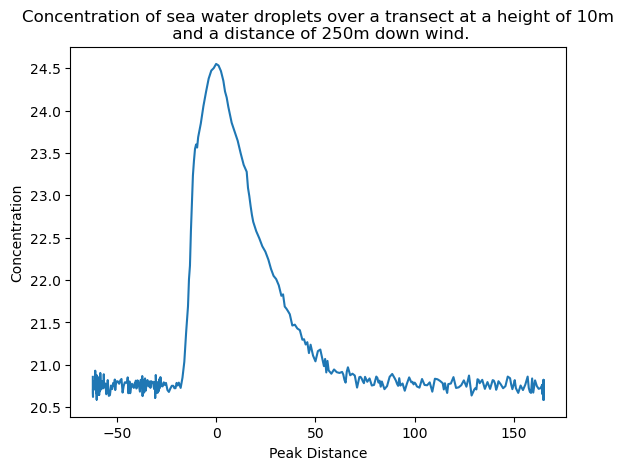

15914984065.6 nan


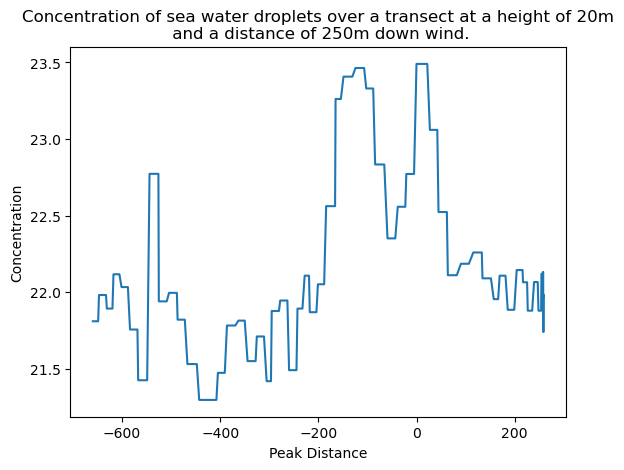

175828767935.0 nan


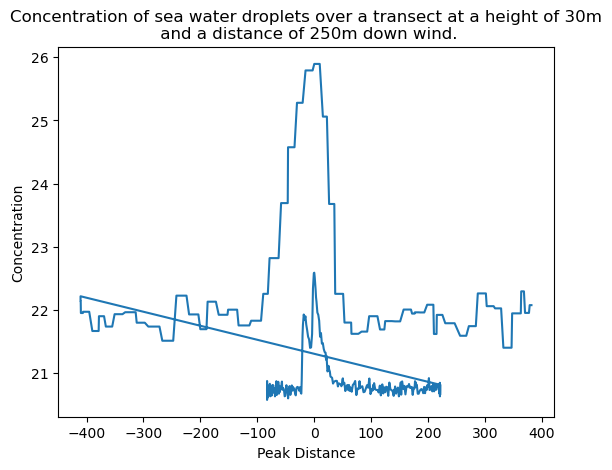

193587263805.85 nan


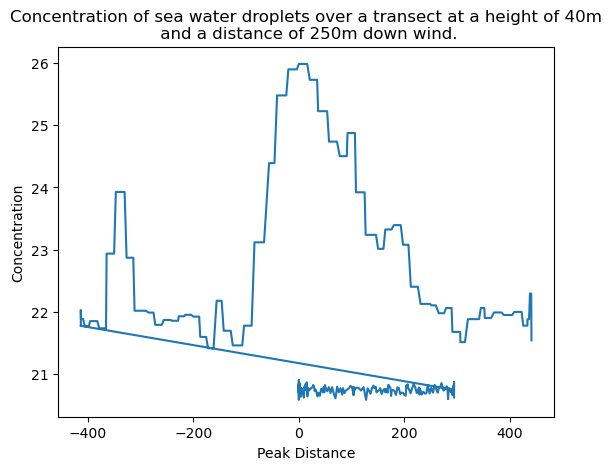

43197548410.101456 37.1173866643828


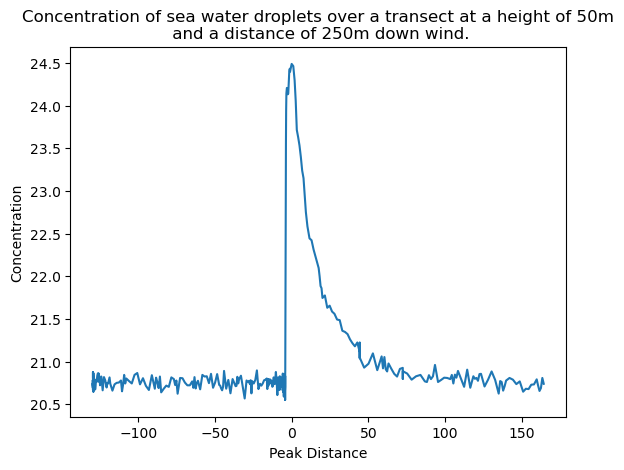

1215975876.809114 -35.4107861930486


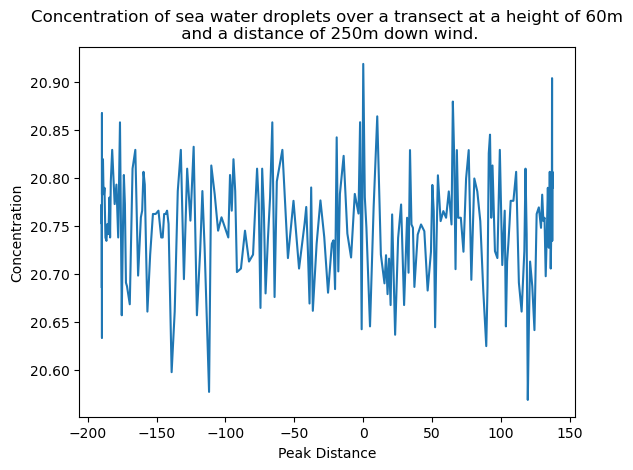

1241422184.2096443 -30.6870699578409


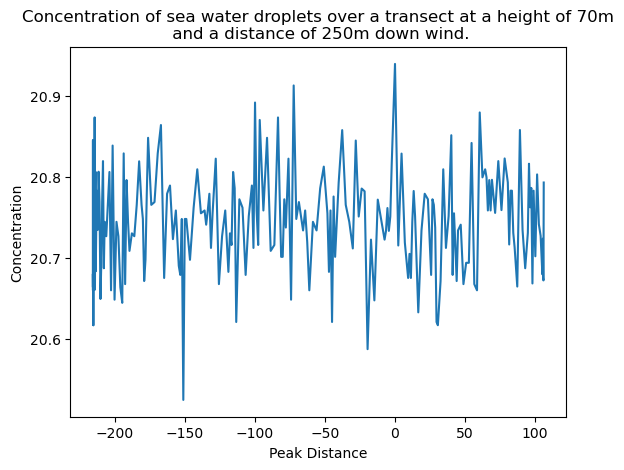

1467174227.1429784 86.1089511691931


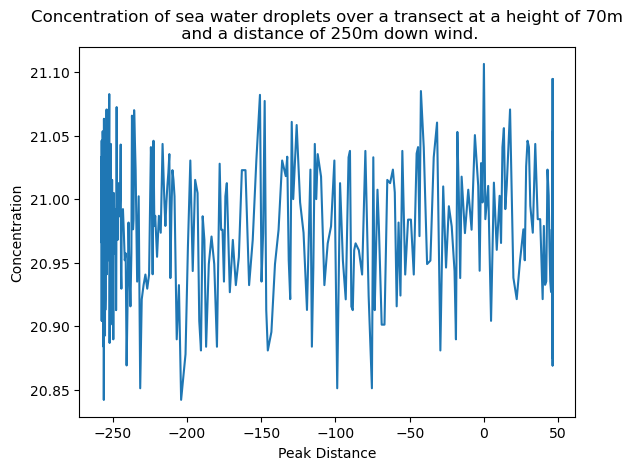

1492706536.1568959 -25.8127992182691


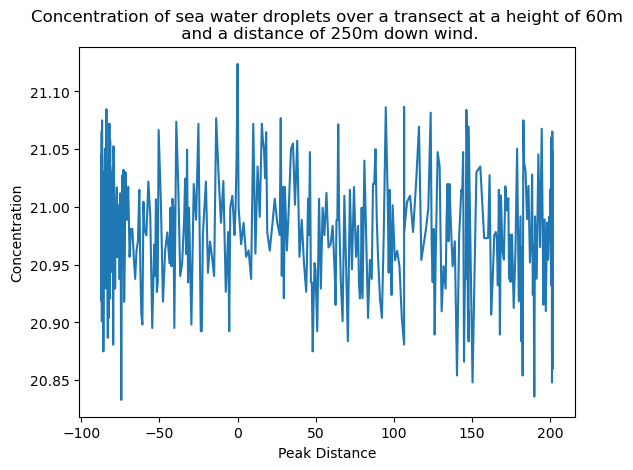

1508551857.3442857 88.7152420023109


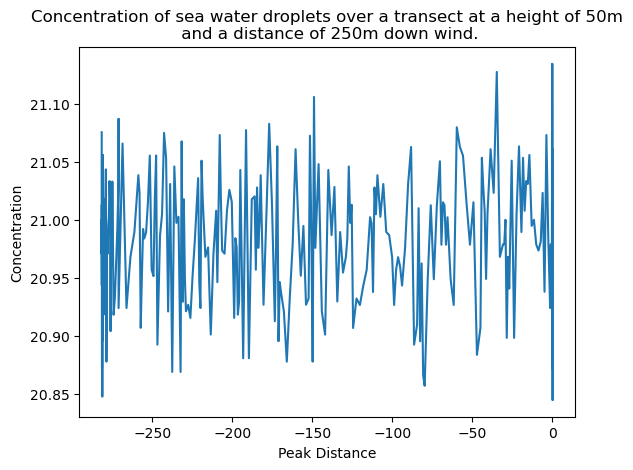

1467767655.9530866 -9.56657066769067


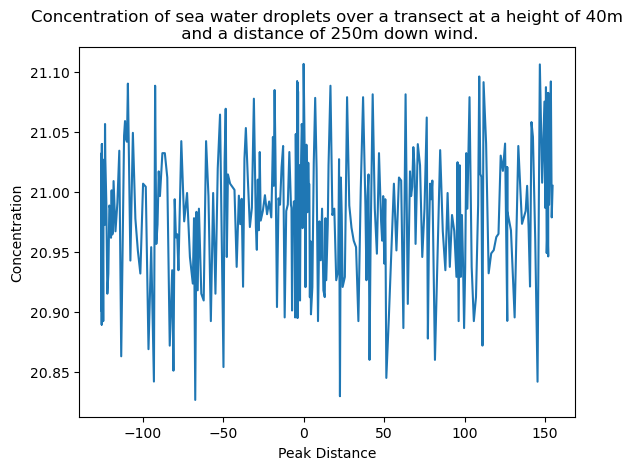

105190472092.91061 -42.8516503894778


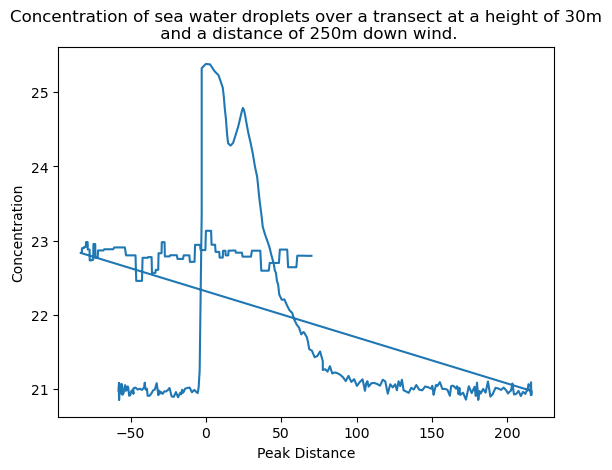

8510018707.200001 111.526950744276


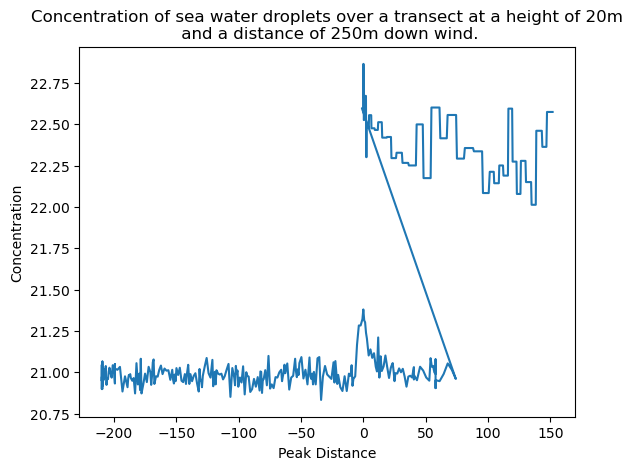

115922464806.23622 -30.496986662734


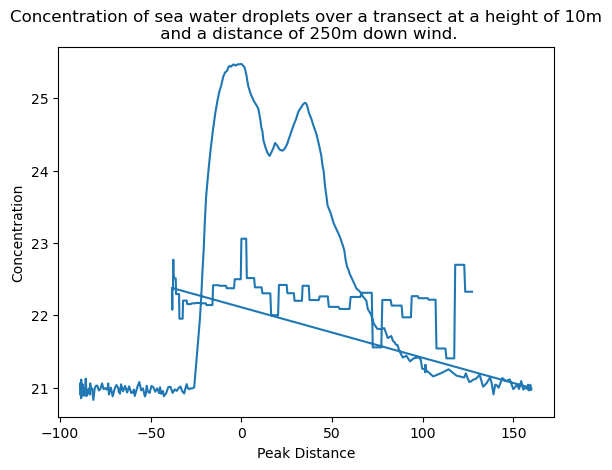

1608392223.7715833 nan


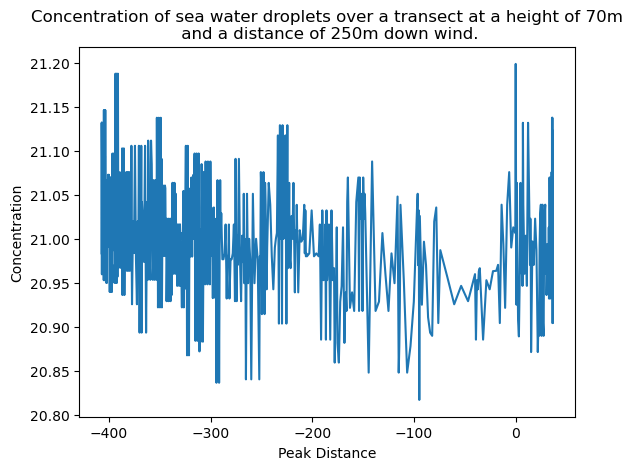

1577241632.9352365 -60.5469598184888


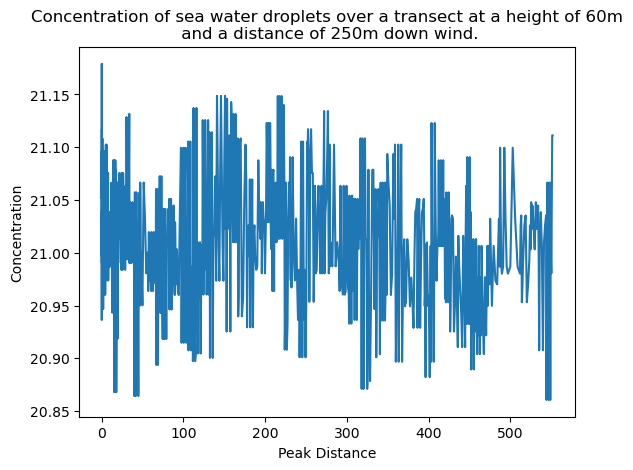

1555372813.7417884 -30.6870699578409


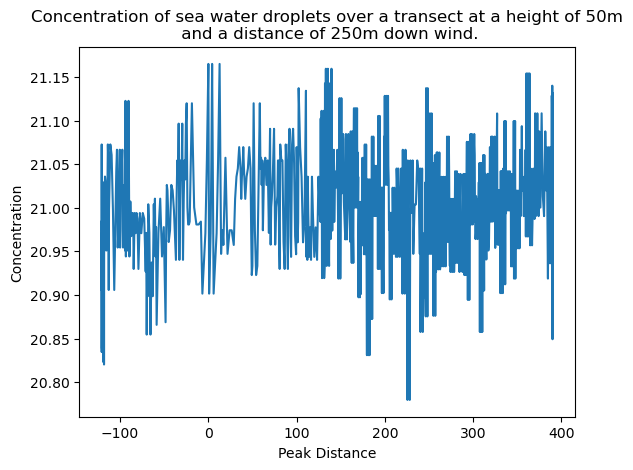

1572939733.3440025 nan


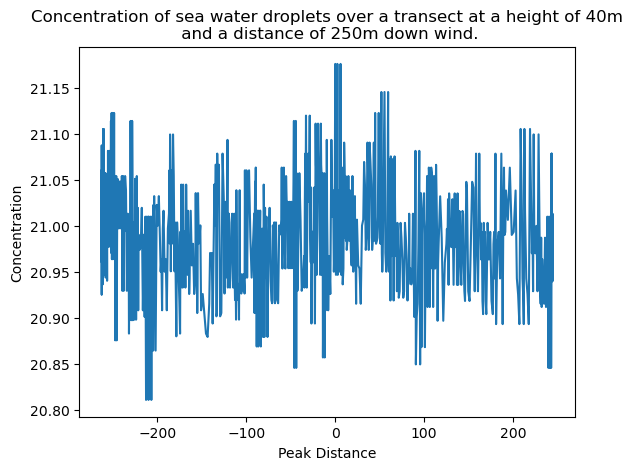

59004342597.28748 157.51294100335


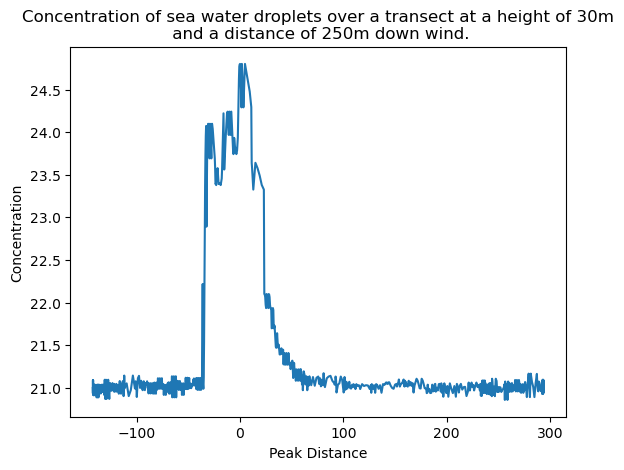

123610962623.97073 nan


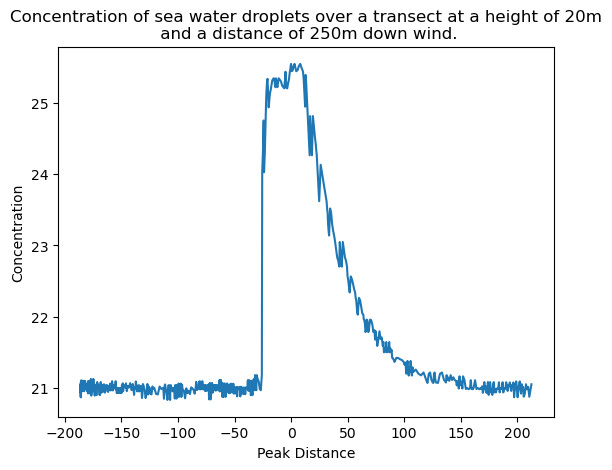

150066901360.4473 -28.5646934450081


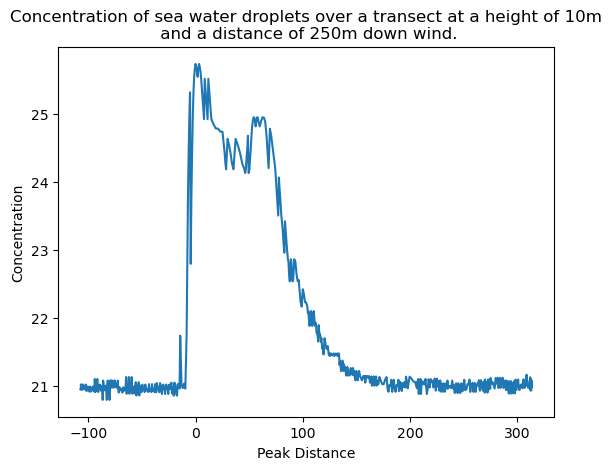

193110830249.2889 -58.7411685149734


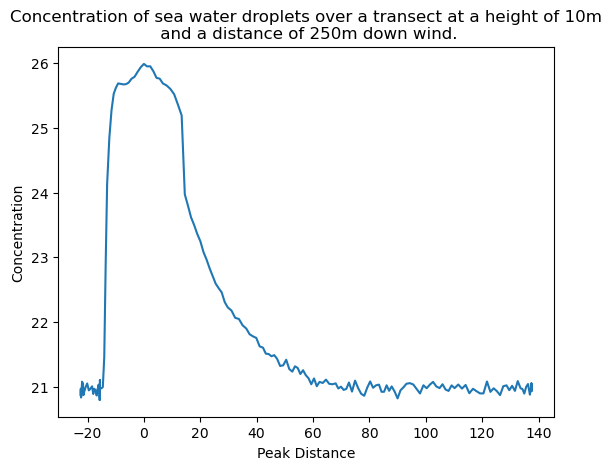

1482389283.5476506 -11.1625464119976


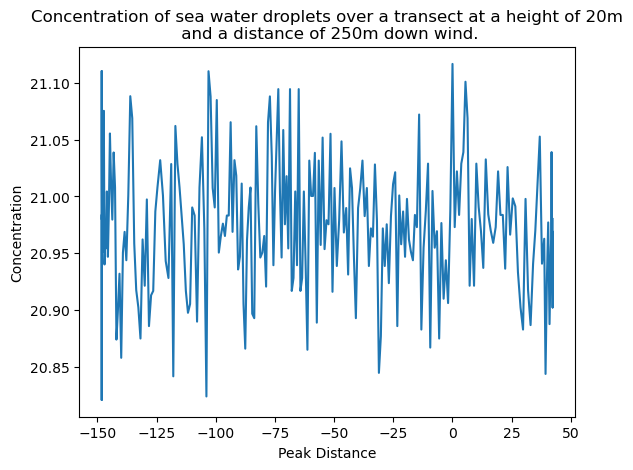

1505542071.2619147 -30.6870699578409


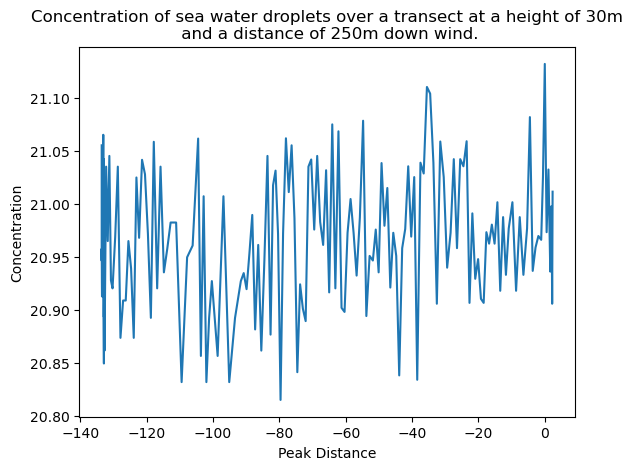

1482276549.6449356 -47.1159250416646


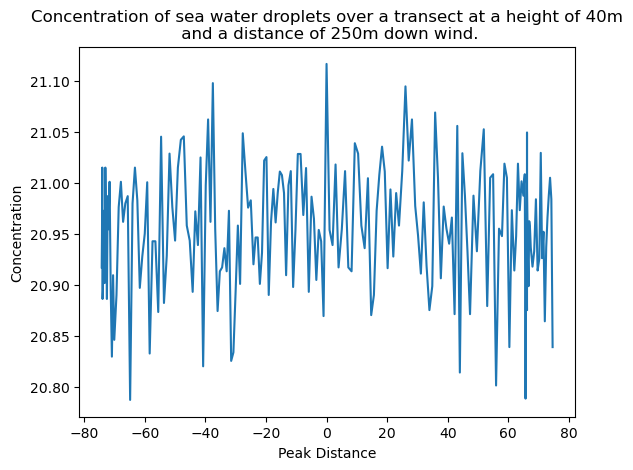

1454657196.6118674 -58.5510852198665


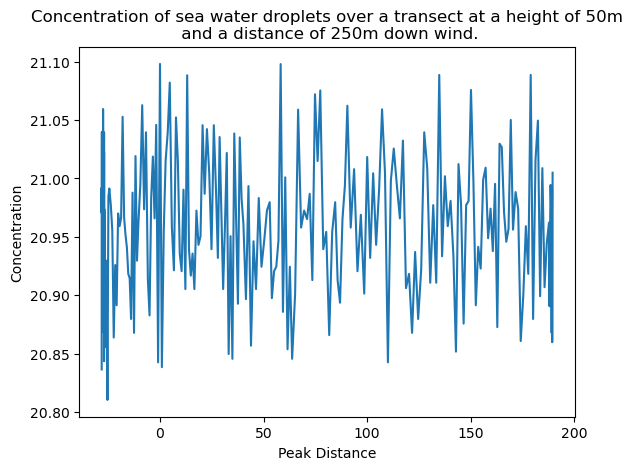

1542478593.6403553 -55.3481667084314


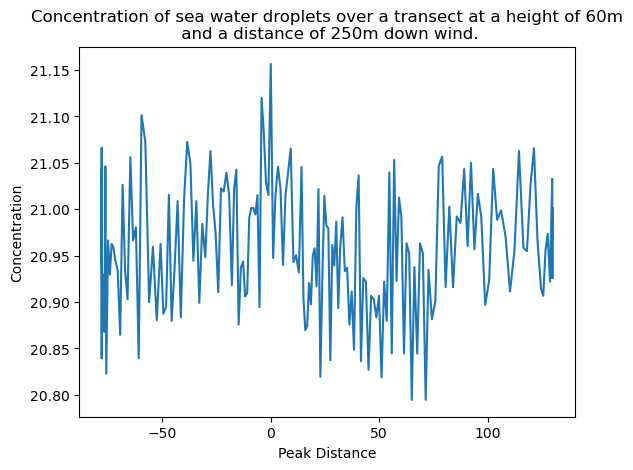

1464236253.677725 -29.0676065722486


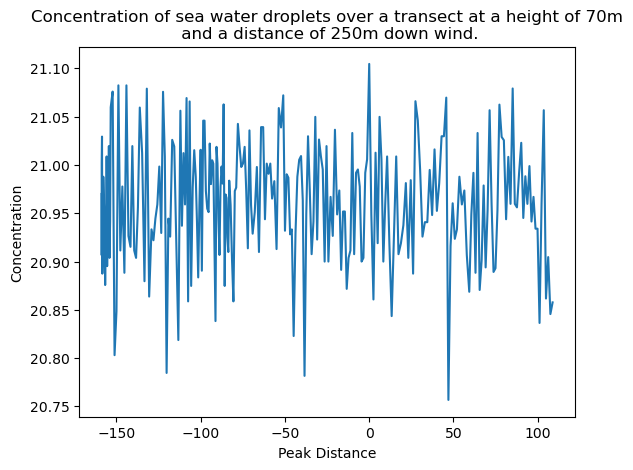

2018422926.8626578 -52.9413367526648


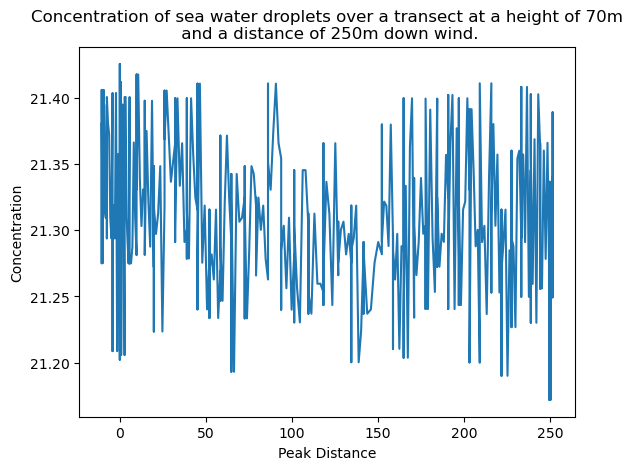

2157868702.0119934 -49.9907721299737


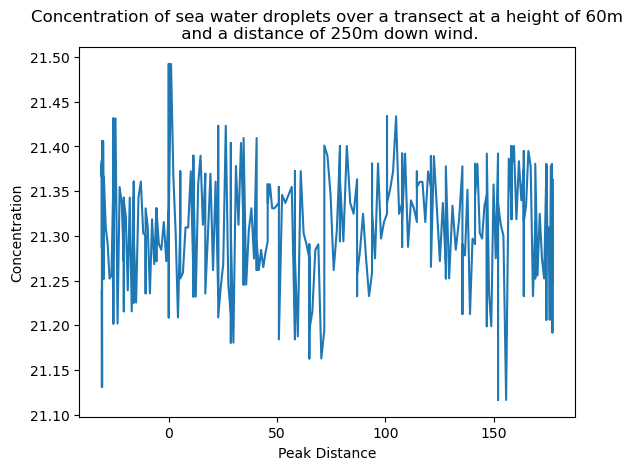

2159194079.2952833 nan


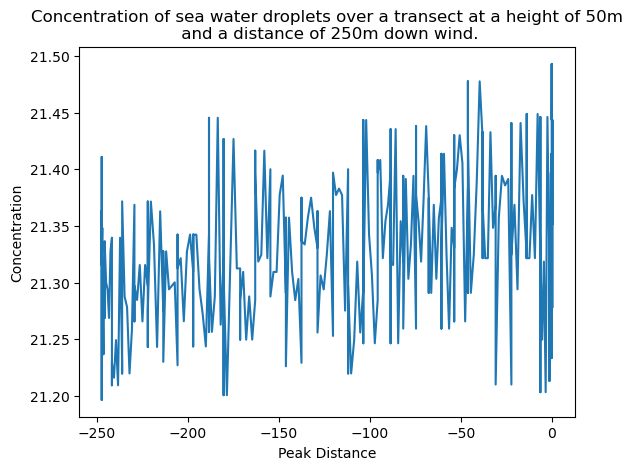

2183373048.103466 -37.5893293793461


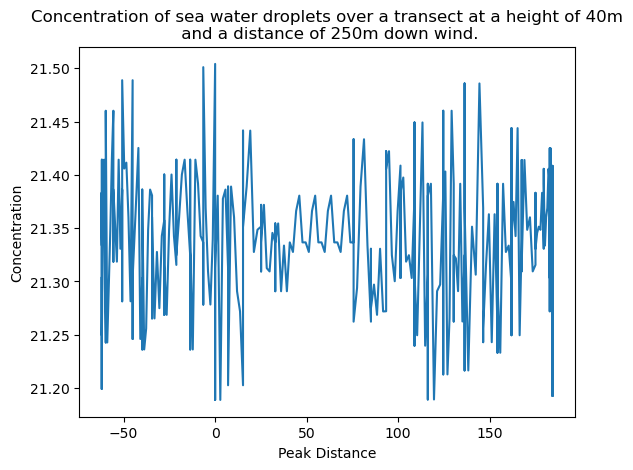

4996731928.553807 -61.0360692629537


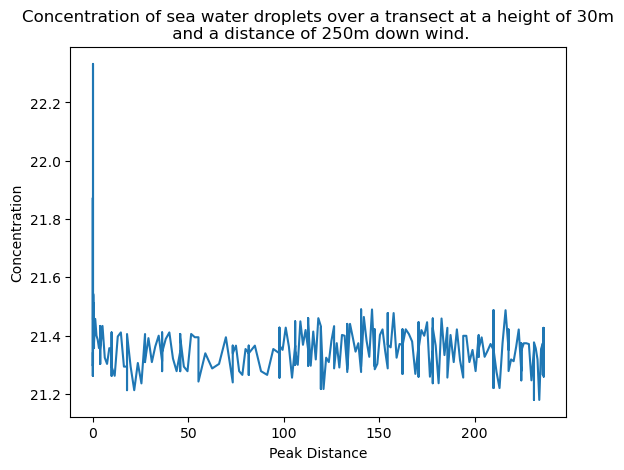

64910274947.104225 -43.9132007942378


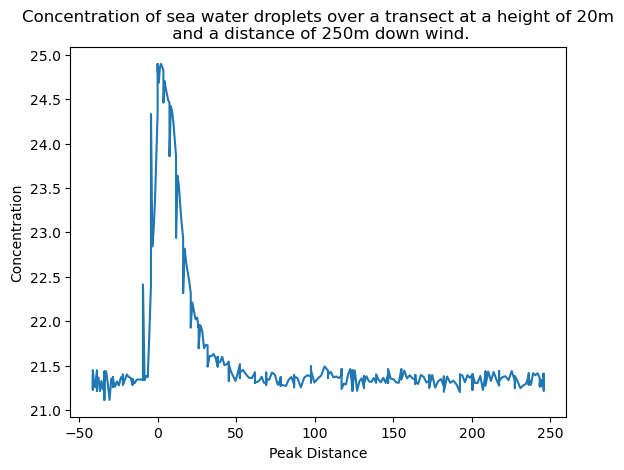

246140055497.12137 -48.8345405848619


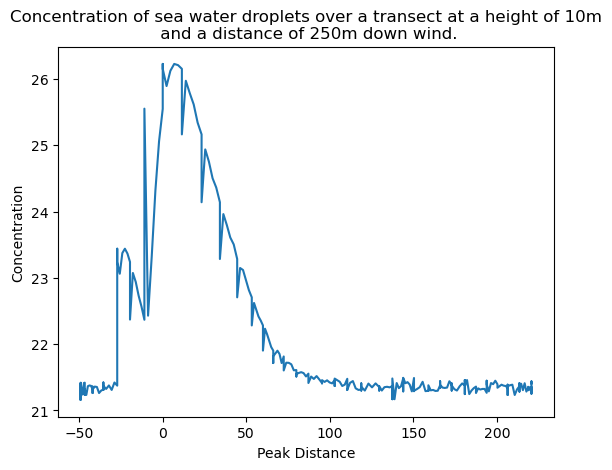

229687144183.69016 124.802450206788


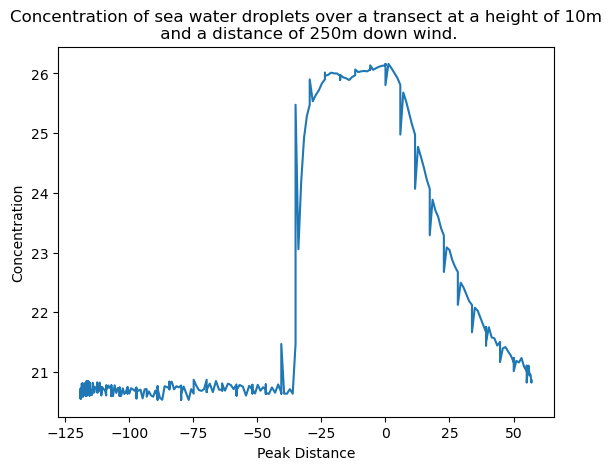

111454068894.44669 16.717601554018


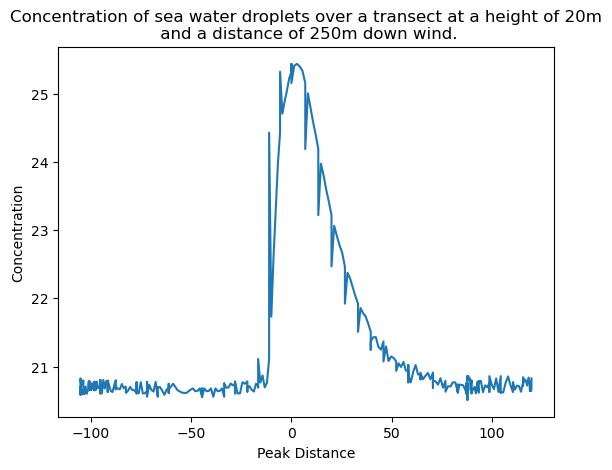

1191053689.9648457 146.91797205315


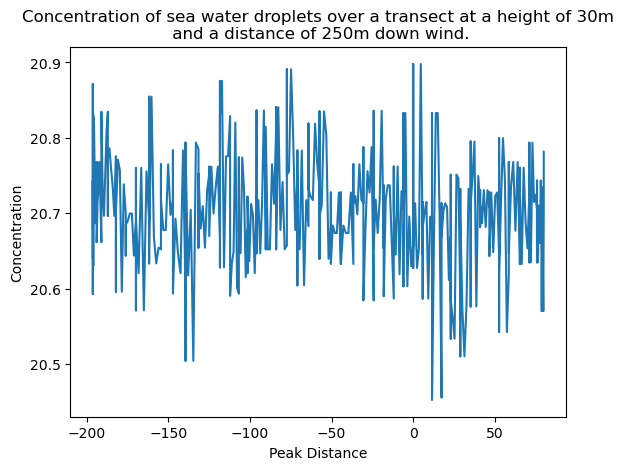

1172940537.5501256 106.314424681193


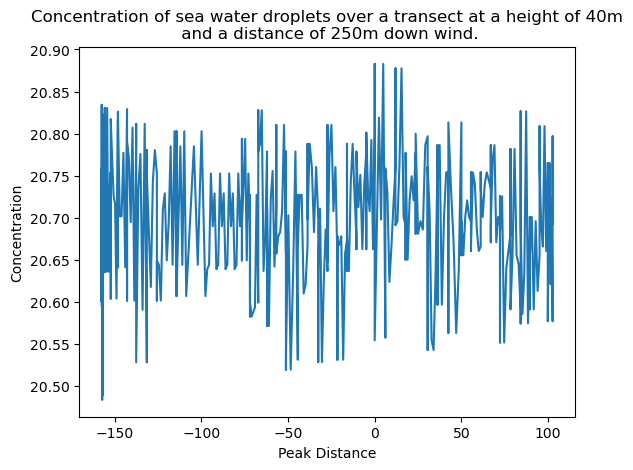

1143960266.39418 -58.9312518100802


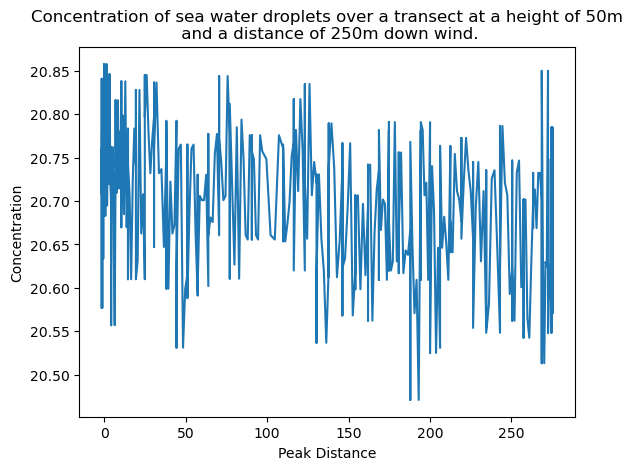

1171907589.8543785 58.055857058748


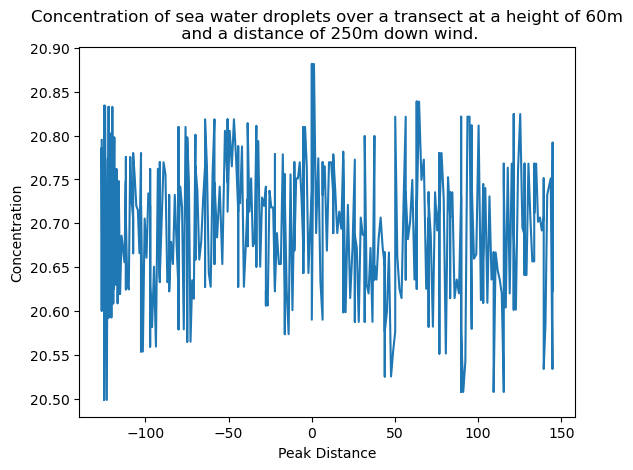

1195840279.8486216 164.323082166201


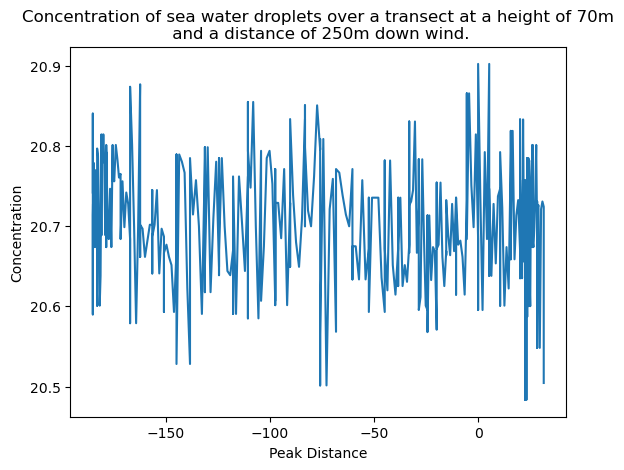

796763943.8757712 51.2665418592395


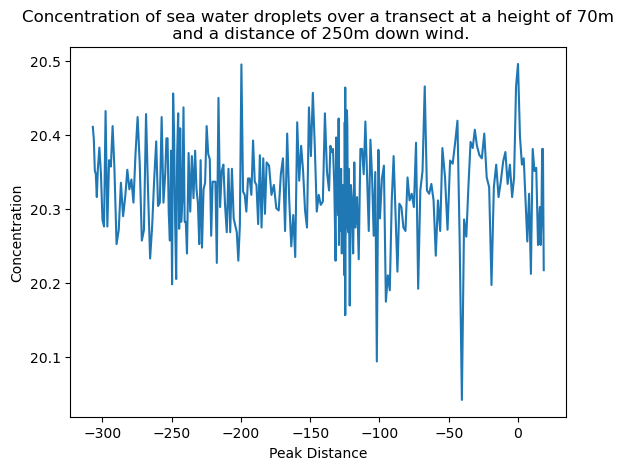

820654764.5408088 7.83007746418062


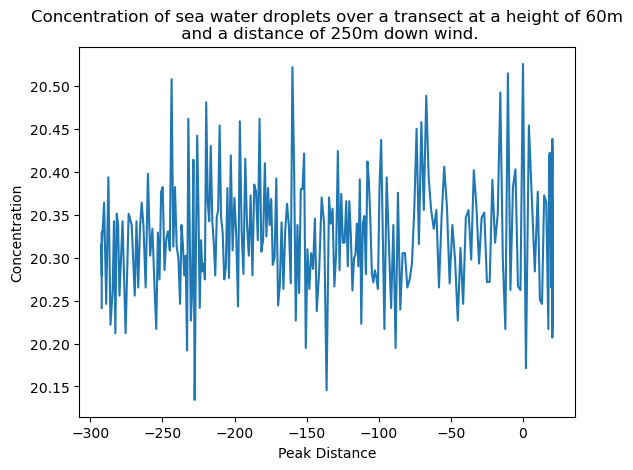

832600562.1544544 -56.7333411089071


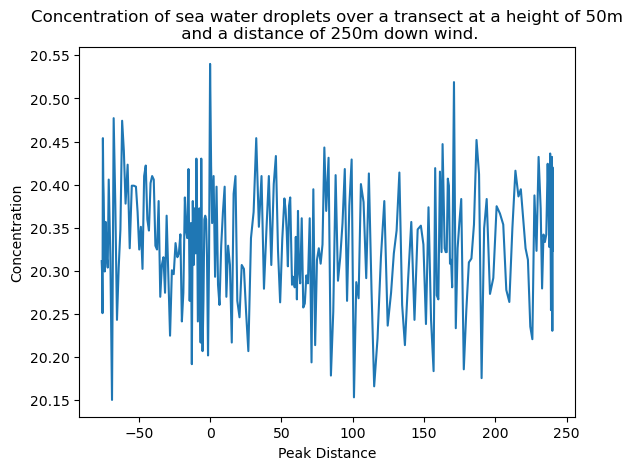

802736552.2230585 -35.8250631301617


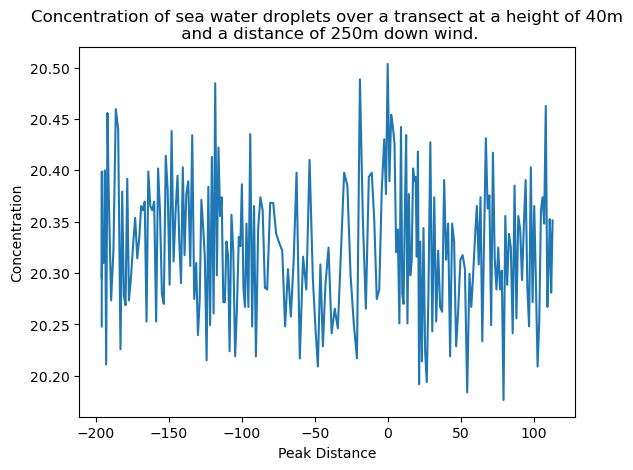

833083406.7084038 18.6930051027894


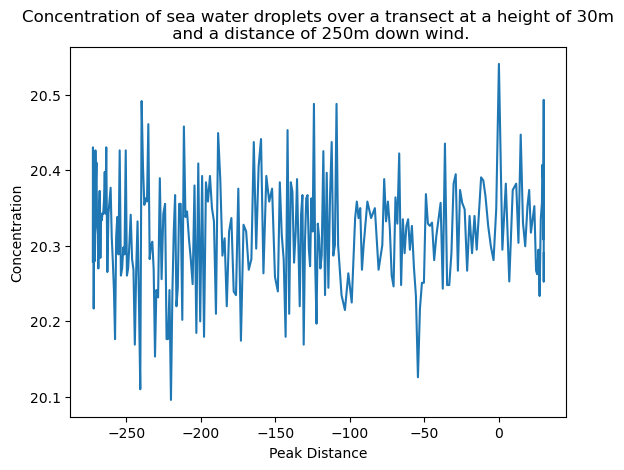

1915211395.5372279 47.5966578512977


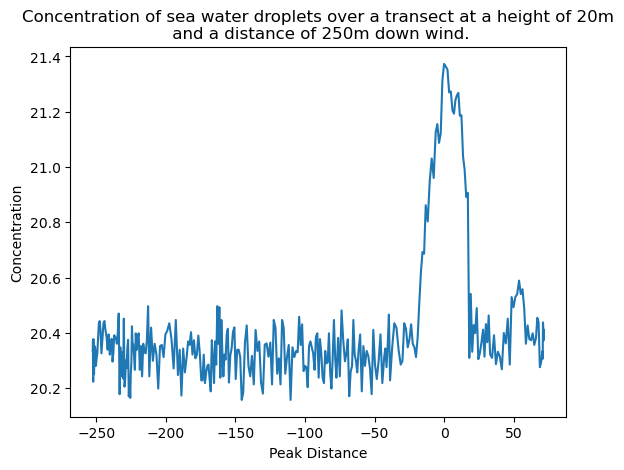

2046442837.4402213 -62.1184895634065


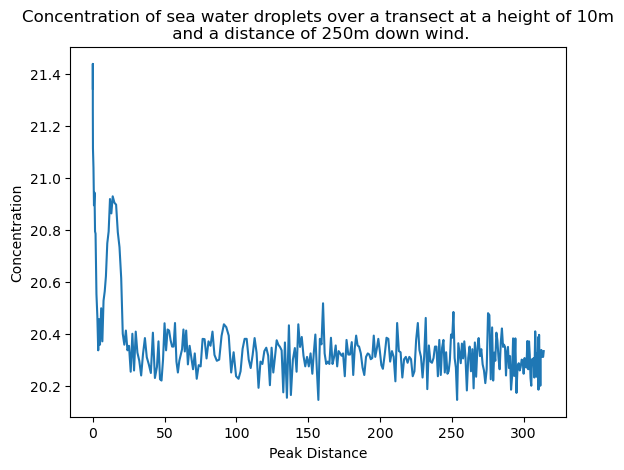

66217881506.3 -29.5315827204919


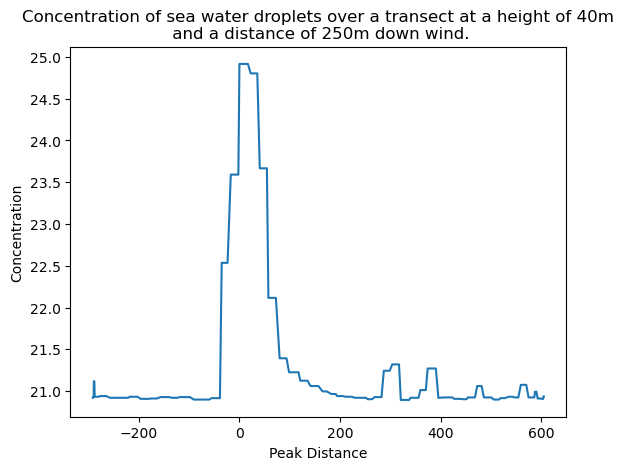

18796040000.0 165.050802209149


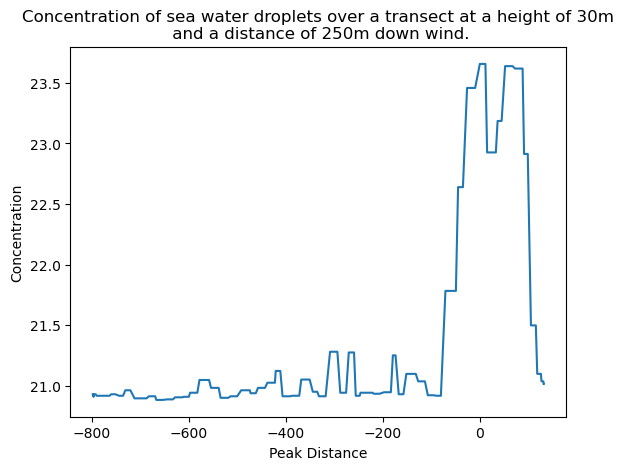

120710519028.70001 -30.6870699578409


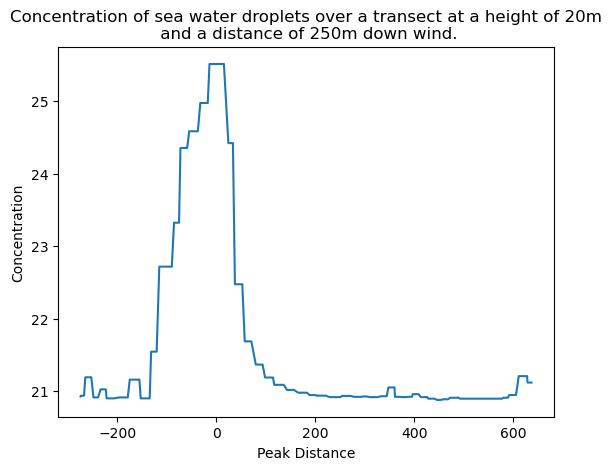

5606417573.4 -13.6760122673832


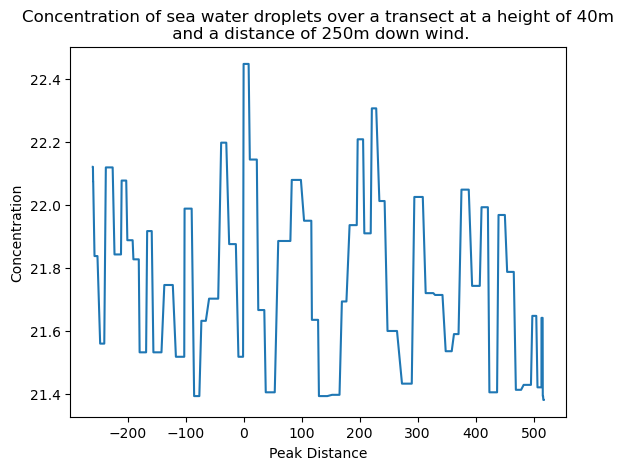

4358255131.65 115.846389820177


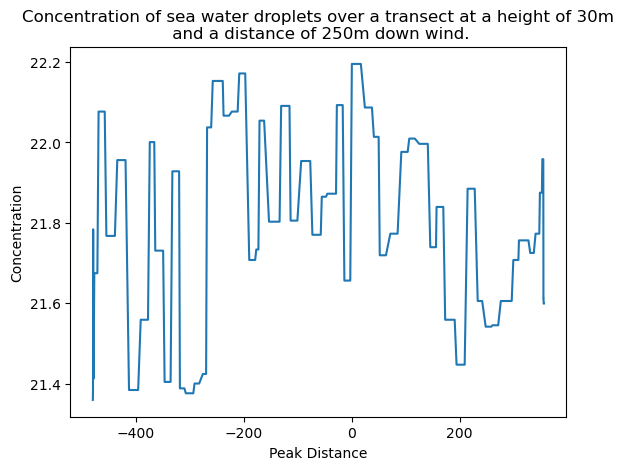

164171431548.6 86.1089511691931


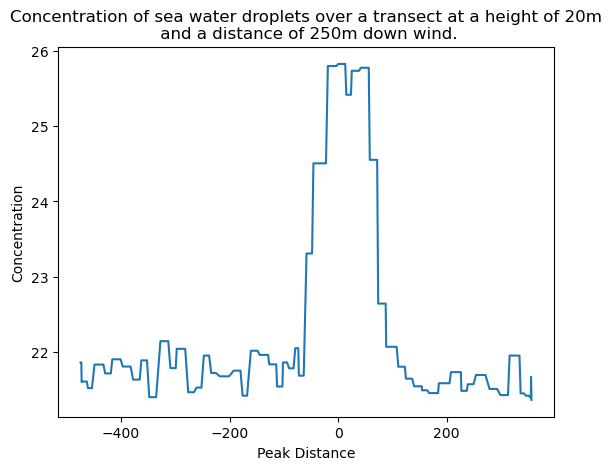

19823798286.399998 -62.1184895634065


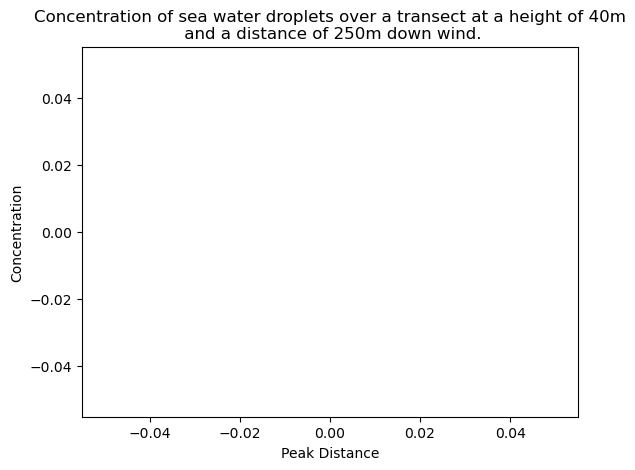

19051228893.35 98.9257732908876


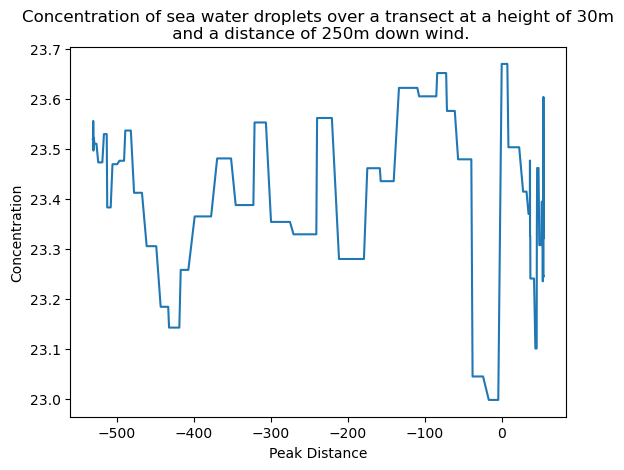

17639723093.35 nan


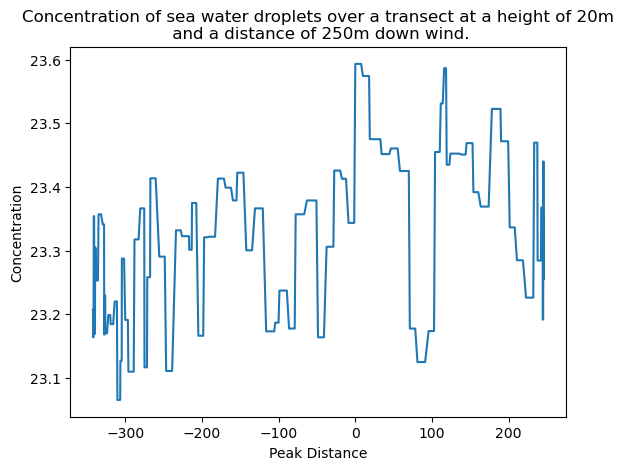

9195793100.481821 121.14973267427


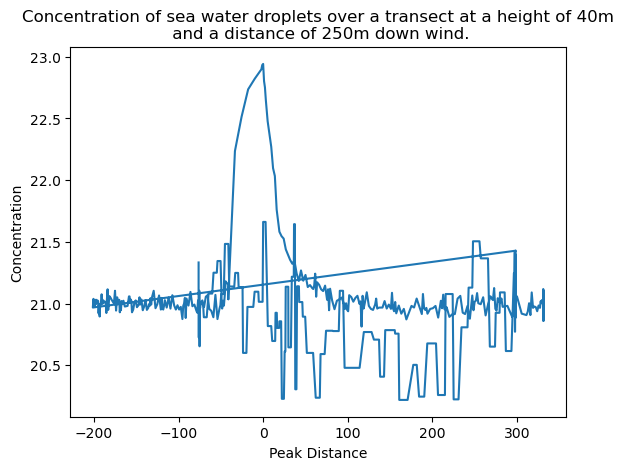

1620929346.25 nan


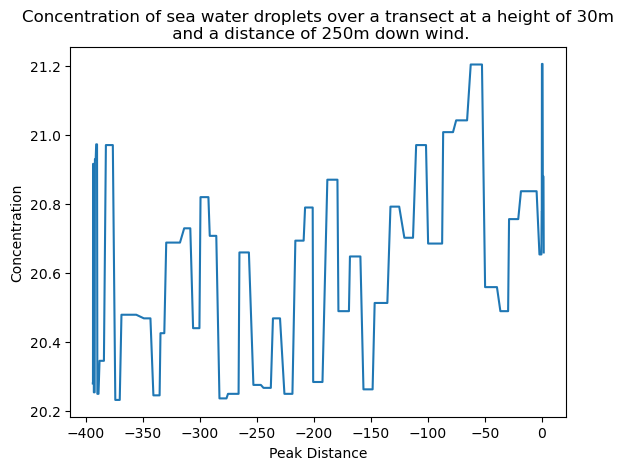

50787315846.25 -59.5965433429544


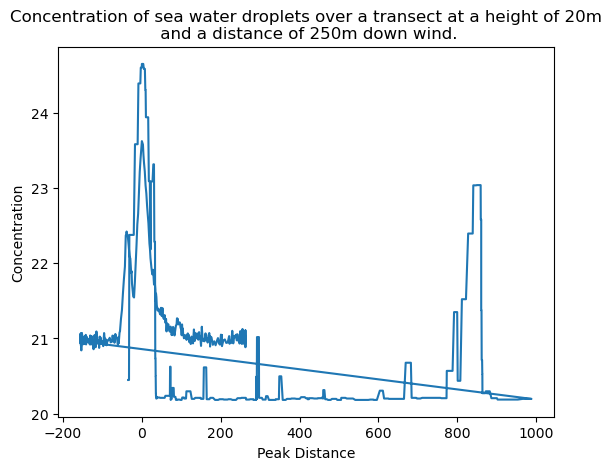

20799864071.320408 -59.5965433429544


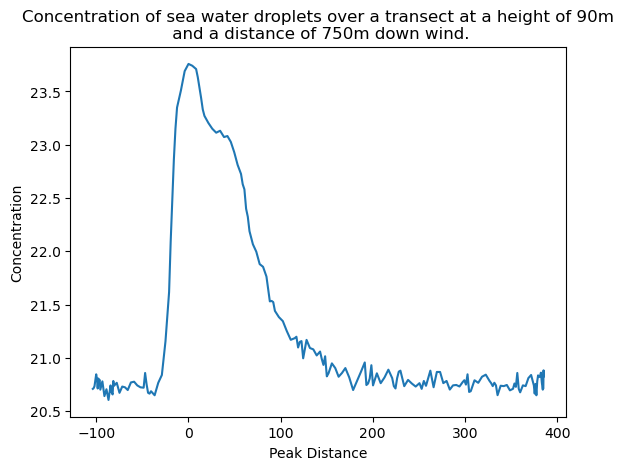

18930566968.684338 -59.1213351051871


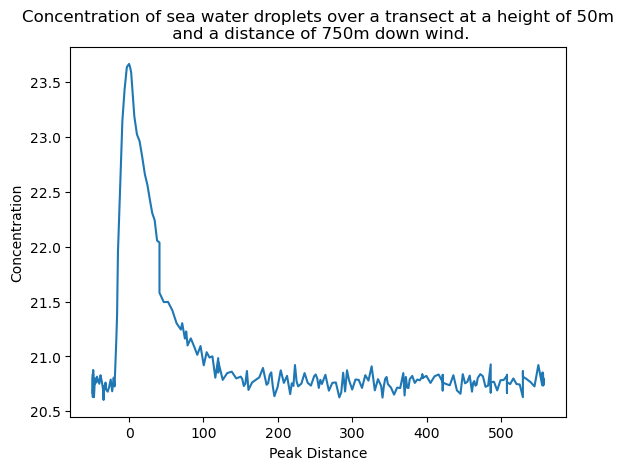

7900276253.040627 128.704945589726


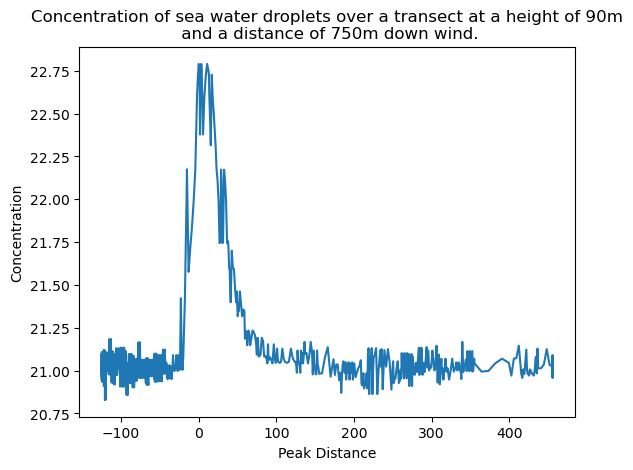

1627713864.2215037 nan


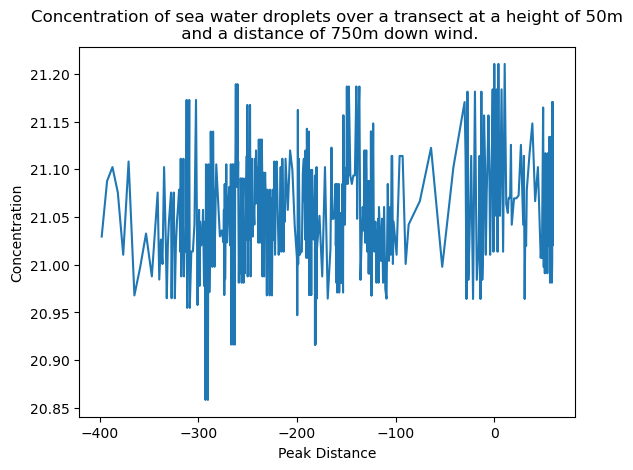

5200158858.936994 -30.6870699578409


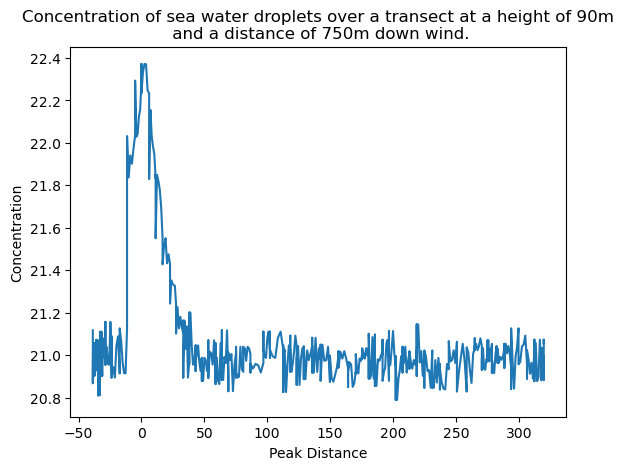

14278156963.000484 -58.5510852198665


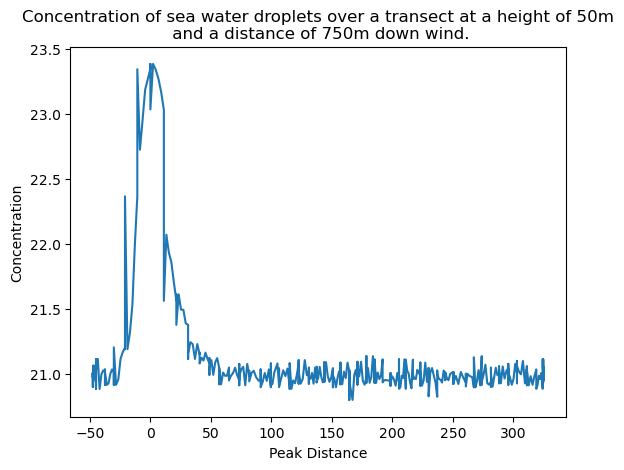

83014303914.24791 -36.8544625316278


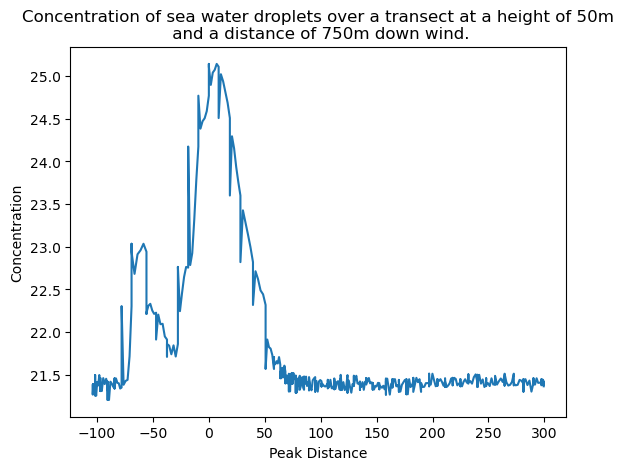

5528697785.580583 -11.6917159102303


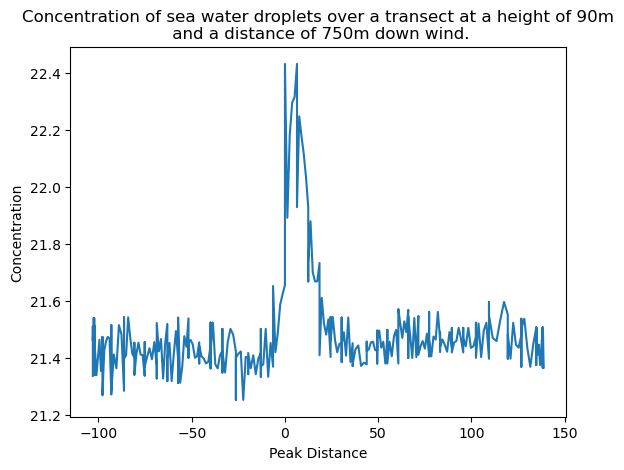

1127442229.1990266 nan


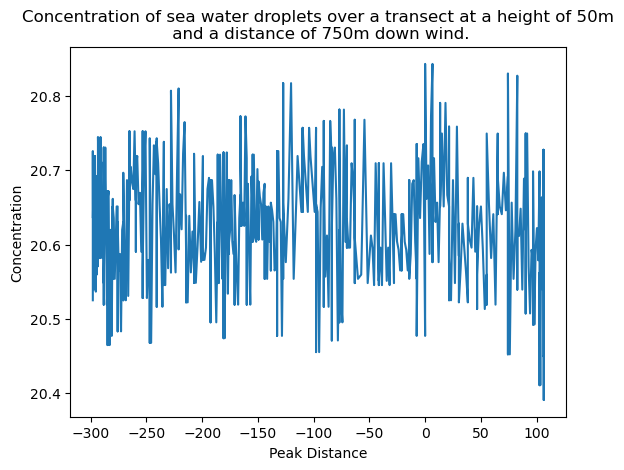

1017033214.5603944 -59.8816682856147


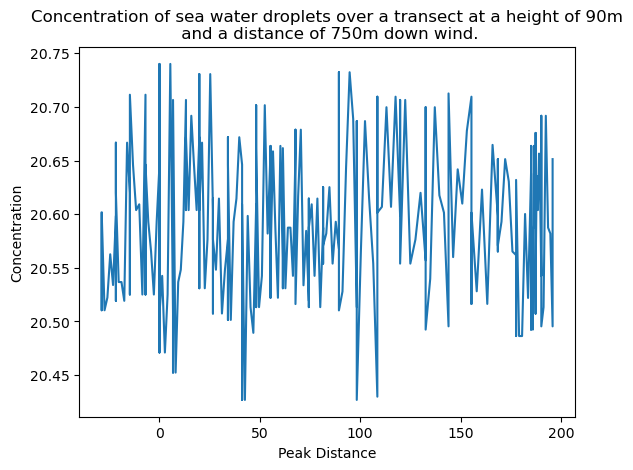

724288247.7342639 18.0345372531989


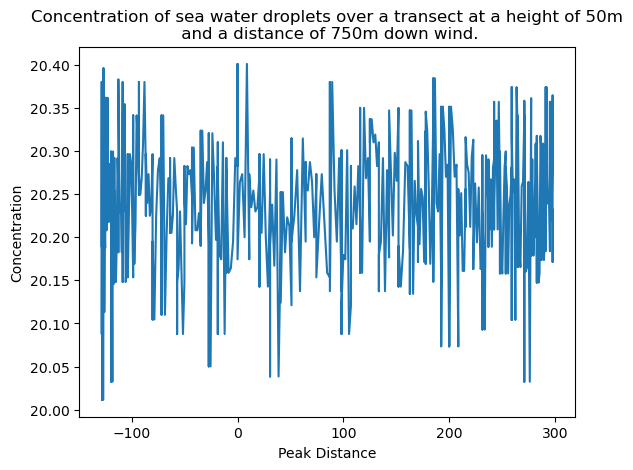

724537821.963584 16.0591337044275


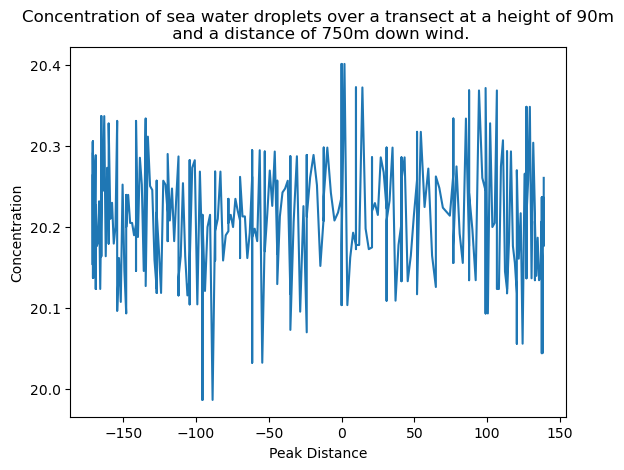

In [14]:
for transect in selected_data.Transect_Num.unique():
    transect_data = selected_data[all_data.Transect_Num == transect]
    peak_val = np.max(transect_data.Norm_Conc)
    peak_val_idx = np.argmax(transect_data.Norm_Conc)
    peak_val_dist = selected_data.loc[peak_val_idx,'Peak_Dist']
    
    height = transect_data.Height.unique()[0]
    distance = transect_data.Distance.unique()[0]

    print(peak_val,peak_val_dist)
    
    plt.plot(transect_data.Peak_Dist, transect_data.Log_Norm_Conc)
    plt.xlabel('Peak Distance')
    plt.ylabel('Concentration')
    plt.title('Concentration of sea water droplets over a transect at a height of ' + str(height) + 'm\n and a distance of ' + str(distance) + 'm down wind.')
    plt.show()

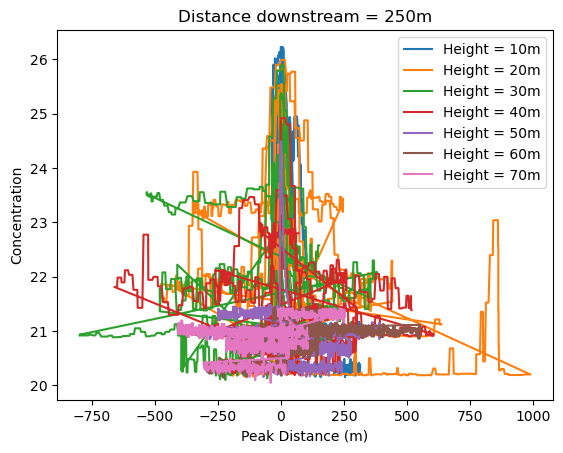

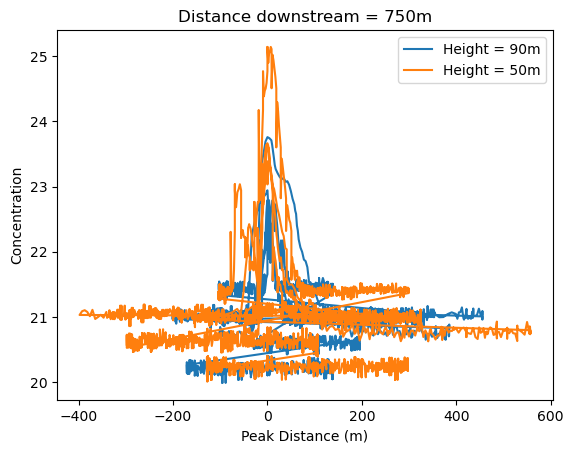

In [16]:
for distance in selected_data.Distance.unique():
    distance_data = selected_data[selected_data['Distance'] == distance]
    for height in distance_data.Height.unique():
        height_data = distance_data[distance_data['Height'] == height]
        plt.plot(height_data.Peak_Dist, height_data.Log_Norm_Conc, label = 'Height = ' + str(height) + 'm')
    plt.xlabel('Peak Distance (m)')
    plt.ylabel('Concentration')
    plt.title('Distance downstream = ' + str(distance) + 'm')
    plt.legend()
    plt.show()